## 2.2 Random Sampling and the Distribution of Sample Averages

- In simple random sampling, $n$ objects are drawn at random from a population, with each object being equally likely to end up in the sample. 
- We denote the value of the random variable $Y$ for the $i^{th}$ randomly drawn object as $Y_i$.
- Since all objects are equally likely to be drawn and the distribution of $Y_i$ is the same for all $i$, the $Y_i, \dots, Y_n$ are independently and identically distributed (iid).
- This means that the distribution of $Y_i$ is the same for all $i=1,\dots,n$ and $Y_1$ is distributed independently of $Y_{2}, \dots, Y_n$ and $Y_2$ is distributed independently of $Y_{1}, Y_{3}, \dots, Y_n$ and so forth.
- Observations are usually sampled randomly from a larger, unknown population.
- An average of a random sample is itself a random variable with its own probability distribution.
- The sample average of a sample of n observations $Y_1, \dots, Y_n$ is:

\begin{equation}
\overline{Y} = \frac{1}{n} \sum_{i=1}^n Y_i = \frac{1}{n} (Y_1 + Y_2 + \cdots + Y_n).
\end{equation}

- The sampling distribution is the probability distribution associated with possible values of $\overline{Y}$ that could be computed for different possible samples $Y_1, \dots, Y_n$.


- For example, the distribution of a single dice roll differs considerably from that of the sum of two dice rolls.

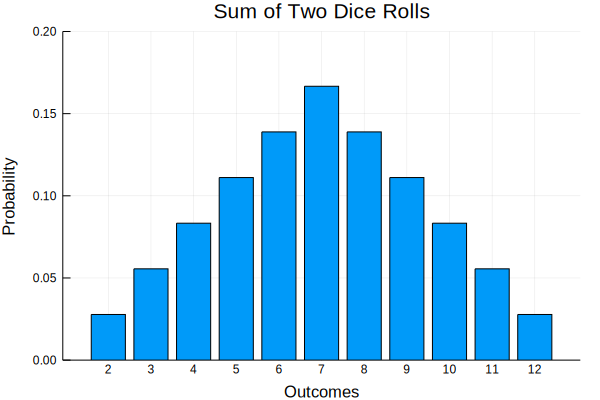

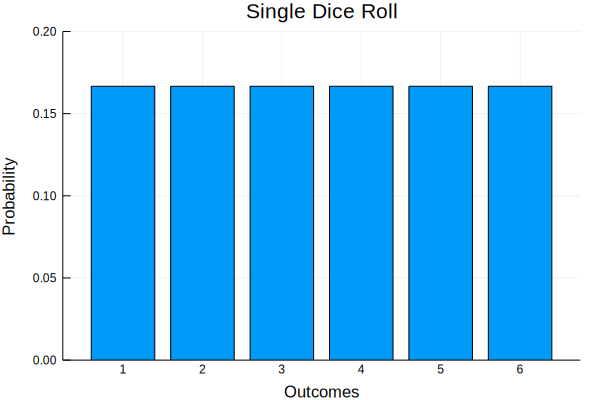

In [24]:
using Plots

diceSumArray = []

for i in 1:6
  
    for j in 1:6
        diceSum = i + j
        push!(diceSumArray, diceSum)
    end
    
end

sort!(diceSumArray)

diceSumValues = []

for i in diceSumArray
    
    if !(i in diceSumValues)
        push!(diceSumValues, i)
    end
    
end

diceSumProbabilities = []

for i in diceSumValues
    diceSumProbabilityNumerator = 0
    
    for j in 1:length(diceSumArray)
        
        if i == diceSumArray[j]
            diceSumProbabilityNumerator = diceSumProbabilityNumerator + 1
        end
        
    end
    
    diceSumProbability = diceSumProbabilityNumerator / 36
    push!(diceSumProbabilities, diceSumProbability)
end

x1 = diceSumValues
y1 = diceSumProbabilities

p1 = plot(
    x1,
    y1,
    st = :bar,
    title = "Sum of Two Dice Rolls",
    label = "",
    xlabel = "Outcomes",
    xticks = x1, 
    ylabel = "Probability", 
    ylims = (0, 0.2),
    yticks = 0:0.05:0.2, 
    )      

display(p1)
            
x2 = 1:6
y2 = [1/6 for _ in x2]

p2 = plot(
    x2,
    y2,
    st = :bar,
    title = "Single Dice Roll",
    label = "",
    xlabel = "Outcomes",
    xticks = x2, 
    ylabel = "Probability", 
    ylims = (0, 0.2),
    yticks = 0:0.05:0.2, 
    )      

display(p2)

### Mean and Variance of the Sample Mean

- Suppose that all observations $Y_1,\dots,Y_n$ are iid and denote $\mu_Y$ and $\sigma^2_Y$ as the mean and the variance of $Y_i$. Then we have that:

\begin{equation}
E(\overline{Y}) = E\left(\frac{1}{n} \sum_{i=1}^n Y_i \right) = \frac{1}{n} E\left(\sum_{i=1}^n Y_i\right) = \frac{1}{n} \sum_{i=1}^n E\left(Y_i\right) = \frac{1}{n} \cdot n \cdot \mu_Y = \mu_Y
\end{equation}

and
\begin{align*}
  \text{Var}(\overline{Y}) =& \text{Var}\left(\frac{1}{n} \sum_{i=1}^n Y_i \right) \\
  =& \frac{1}{n^2} \sum_{i=1}^n \text{Var}(Y_i) + \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1, j\neq i}^n \text{cov}(Y_i,Y_j) \\
  =& \frac{\sigma^2_Y}{n} \\
\end{align*}

- In summary, the mean, the variance, and the standard deviation of the sample mean $\overline{Y}$ are:

\begin{equation}
E(\overline{Y}) = \mu_Y \\
\text{Var}(\overline{Y}) = \sigma^2_\overline{Y} = \frac{\sigma^2_Y}{n} \\
\text{SD}(\overline{Y}) = \sigma_\overline{Y} = \frac{\sigma_Y}{\sqrt{n}}
\end{equation}

### The Sampling Distribution of $\overline{Y}$ when $Y$ Is Normally Distributed

- If the $Y_1,\dots,Y_n$ are i.i.d. draws from a normal distribution with mean $\mu_Y$ and variance $\sigma_Y^2$, the following holds for their sample average $\overline{Y}$:
\begin{equation}
\overline{Y} \sim N(\mu_Y, \frac{\sigma_Y^2}{n})
\end{equation}


- For example, if a sample $Y_i$ with $i = 1,\dots,10$ is drawn from a standard normal distribution with mean $\mu_Y = 0$ and variance $\sigma^2_Y = 1$ we have:

\begin{equation}
\overline{Y} \sim N(0,0.1)
\end{equation}


- We can verify the theoretical claim of the above example using a Monte Carlo simulation, which shows that a large number of averages from samples of length 10, drawn from a standard normal distribution, produces a pdf that closely approximates that of a normal distribution with mean $\mu_Y = 0$ and variance $\sigma^2_Y = 0.1$.

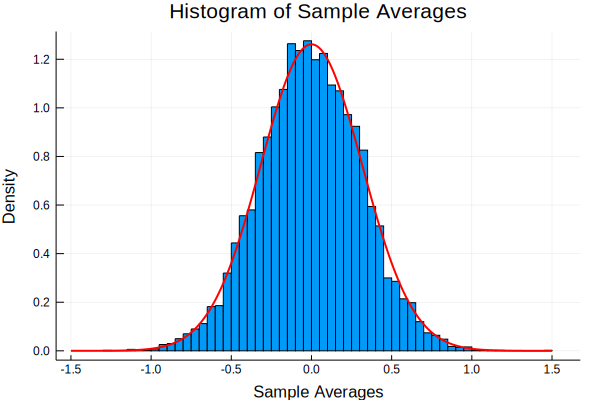

In [3]:
using Distributions
using Plots

d1 = Normal() #standard normal distribution from which our samples will be taken and averaged

N = 10000 #number of samples
n = 10 #size of sample to be averaged

sampleAverageArray = [mean(rand(d1, n)) for _ in 1:N] 
#produce the dataset of N sample averages from samples of length n, randomly drawn from a standard normal distribution

p1 = plot(
    sampleAverageArray, #histogram only requires one dataset
    st = :histogram,
    title = "Histogram of Sample Averages",
    label = "",
    bins = 100, #number of histogram bins
    xlabel = "Sample Averages", 
    ylabel = "Density", 
    normed = :pdf #histogram normalised to a discrete pdf, where the total area of the bins is 1
    )

d2 = Normal(0, 1/sqrt(n)) #initialise and define the theoretical distribution of sample averages
#our averaged samples were taken from a standard normal distribution, which had mean 0 and sd 1

x = -1.5:0.01:1.5 #define the x continuous range
y = pdf(d2, x) #define the probabilities of the theoretical distribution of sample averages

plot!( #overlay the theoretical distribution of sample averages on top of the histogram
    p1,
    x,
    y,
    st = :line,
    lc = :red,
    lw = 2,
    label = ""
)

display(p1)

- We can also use a Monte Carlo simulation to prove that a chi-squared distribution approximates the distribution of a large number of sample sums with sample length equal to the degrees of freedom and each sample being both drawn from a standard normal distribution and squared. 

- We can verify the theoretical claim of the above example using a Monte Carlo simulation, which shows that a large number of averages from samples of length 10, drawn from a standard normal distribution, produces a pdf that closely approximates that of a normal distribution with mean $\mu_Y = 0$ and variance $\sigma^2_Y = 0.1$.

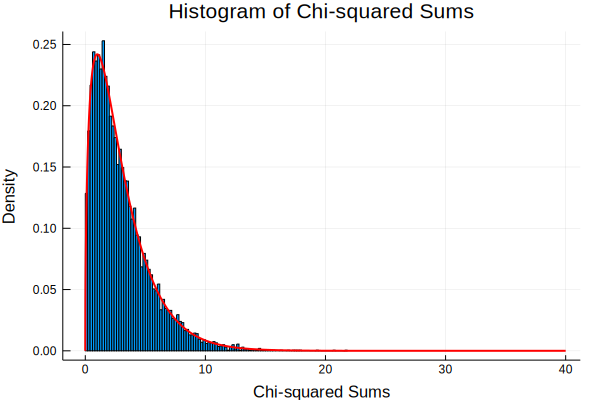

In [5]:
using Distributions
using Plots

d1 = Normal() #standard normal distribution from which our samples will be taken to be squared and summed

N = 10000 #number of samples
n = 3 #degrees of freedom/number of variates to be squared and summed per sample

chiSquaredArray = [sum((rand(d1))^2 for _ in 1:n) for _ in 1:N] 
#produce the dataset of N chi-squared samples from samples of length n, randomly drawn from a standard normal distribution

p1 = plot(
    chiSquaredArray, #histogram only requires one dataset
    st = :histogram,
    title = "Histogram of Chi-squared Values",
    label = "",
    bins = 100, #number of histogram bins
    xlabel = "Chi-squared Values", 
    ylabel = "Density", 
    normed = :pdf #histogram normalised to a discrete pdf, where the total area of the bins is 1
    )

d2 = Chisq(n) #initialise and define the theoretical chi-squared distribution

x = 0:0.01:40 #define the x continuous range
y = pdf(d2, x) #define the probabilities of the theoretical distribution of sample averages

plot!( #overlay the theoretical distribution of sample averages on top of the histogram
    p1,
    x,
    y,
    st = :line,
    lc = :red,
    lw = 2,
    label = ""
)

display(p1)

### Large Sample Approximations to Sampling Distributions

- There are two approaches to characterising sampling distributions.
- The exact approach entails deriving a formula for the sampling distribution that exactly describes the distribution of $\overline{Y}$ for any valu n, that is the exact distribution or finite-sample distribution of $Y$.
- The approximate approach uses approximations to the sampling distribution that rely on the sample size being large.
- The large-sample approximation to the sampling distribution is called the asymptotic distribution as the approximations become exact in the limit that $n: \infty$.
- The two key tools used to approximate sampling distributions when the sample size is large are the law of large numbers and the central limit theorem.


- The law of large numbers says that, when the sample size is large, $\overline{Y}$ will be close to $\mu_Y$ with very high probability.
- When a large number of random variables with the same mean are averaged together, the large values balance the small values and their sample average is close to their common mean.
- The property that $\overline{Y}$ is near $\mu_Y$ with increasing probability as n increases is called convergence in probability, or more concisely, consistency. 
- The law of large numbers states that, if $Y_i, i=1,\dots,n$ are iid and large outliers are unlikely, $(\text{var}(Y_i) = \sigma^2_Y < \infty)$, $\overline{Y}$ converges in probability to $\mu_Y$ or, equivalently, that $\overline{Y}$ is consistent for $\mu_Y$.


- Formally:
- The sample average $\overline{Y}$ converges in probability to $\mu_Y$ (or, equivalently, $\overline{Y}$ is consistent for $\mu_Y$), denoted $\overline{Y} \xrightarrow[]{p} \mu_Y$, if the probability that $\overline{Y}$ is in the range $\mu_Y - c$ to $\mu_Y + c$ becomes arbitrarily close to 1 as n increases for any constant c > 0.
- The law of large numbers says that if $Y_i, i=1,\dots,n$ are iid with $E(Y_i) = \mu_Y$ and if large outliers are unlikely, $(\text{var}(Y_i) = \sigma^2_Y < \infty)$, then $\overline{Y} \xrightarrow[]{p} \mu_Y$.


- The central limit theorem says that, when the sample size is large, the sampling distribution of the standardised sample average, $(\overline{Y} - \mu_Y)/\sigma_\overline{Y}$, is approximately normal.


- Formally:
- If $Y_1,\dots,Y_n$ are iid with $E(Y_i)=\mu_Y$ and $\text{Var}(Y_i)=\sigma^2_Y$, where $\text{Var}(Y_i)=\sigma^2_Y$, as $n: \infty$, the distribution of $(\overline{Y} - \mu_Y) / \sigma_{\overline{Y}}$, or 
$(\overline{Y} - \mu_Y) / (\frac{\sigma_Y}{\sqrt{n}})$ as $\sigma_\overline{Y} = \frac{\sigma_Y}{\sqrt{n}}$, becomes arbitrarily well approximated by the standard normal distribution.


- As previously discussed, the distribution of $\overline{Y}$ is exactly $N(\mu_Y,\sigma^2_\overline{Y})$ when the sample is drawn from a population with the the normal distribution $N(\mu_Y,\sigma^2_Y)$.
- The central limit theorem says that this same result is approximately true when n is large even if $Y_1,\dots,Y_n$ are not themselves normally distributed.
- Because the distribution of $\overline{Y}$ approaches the normal as n grows large, $\overline{Y}$ is said to have an asymptotic normal distribution.
- While exact sampling distributions are complicated and depend on the distribution of $Y$, the asymptotic distributions are simple as the asymptotic normal distribution of $(\overline{Y} - \mu_Y)/\sigma_\overline{Y}$ does not depend on the distribution of $Y$.
- This normal approximate distribution provides enormous simplifications and underlies much of the theory of regression.
